In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kamilpytlak/personal-key-indicators-of-heart-disease")

print("Path to dataset files:", path)

/Users/jackiewang/Documents/GitHub/COGS109_Indicators_of_Heart_Disease/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/jackiewang/.cache/kagglehub/datasets/kamilpytlak/personal-key-indicators-of-heart-disease/versions/6


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')
import os

# List files in the downloaded directory
print("Files in directory:", os.listdir(path))

# Load the CSV file (adjust filename if different)
csv_file = os.path.join(path, '2022', 'heart_2022_no_nans.csv')
df = pd.read_csv(csv_file)

# Check the shape
print("Dataset shape:", df.shape)
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Files in directory: ['2022', '2020']
Dataset shape: (246022, 40)
Rows: 246022
Columns: 40
Dataset shape: (246022, 40)
Rows: 246022
Columns: 40


In [3]:
# check how imbalanced our target variable is
print("Class Distribution of HadHeartAttack\n")
print(df['HadHeartAttack'].value_counts())
print(f"\nAs percentages:")
print(df['HadHeartAttack'].value_counts(normalize=True) * 100)
print(f"\nTotal: {len(df):,} samples")
print(f"Imbalance ratio: {df['HadHeartAttack'].value_counts()['No'] / df['HadHeartAttack'].value_counts()['Yes']:.2f}:1")

Class Distribution of HadHeartAttack

HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

As percentages:
HadHeartAttack
No     94.539106
Yes     5.460894
Name: proportion, dtype: float64

Total: 246,022 samples
Imbalance ratio: 17.31:1


In [4]:
print(df.head())

     State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0  Alabama  Female     Very good                 4.0               0.0   
1  Alabama    Male     Very good                 0.0               0.0   
2  Alabama    Male     Very good                 0.0               0.0   
3  Alabama  Female          Fair                 5.0               0.0   
4  Alabama  Female          Good                 3.0              15.0   

                                     LastCheckupTime PhysicalActivities  \
0  Within past year (anytime less than 12 months ...                Yes   
1  Within past year (anytime less than 12 months ...                Yes   
2  Within past year (anytime less than 12 months ...                 No   
3  Within past year (anytime less than 12 months ...                Yes   
4  Within past year (anytime less than 12 months ...                Yes   

   SleepHours            RemovedTeeth HadHeartAttack  ... HeightInMeters  \
0         9.0            Non

In [5]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

# EDA

In [6]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,246022.0,4.119026,8.405844,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,246022.0,4.167140,8.102687,0.00,0.00,0.00,4.00,30.00
SleepHours,246022.0,7.021331,1.440681,1.00,6.00,7.00,8.00,24.00
HeightInMeters,246022.0,1.705150,0.106654,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,246022.0,83.615179,21.323156,28.12,68.04,81.65,95.25,292.57
BMI,246022.0,28.668136,6.513973,12.02,24.27,27.46,31.89,97.65


PhysicalHealth = number of days in the past month you felt physically unwell

MentalHealth = number of days in the past month you felt mentally unwell

## Research Questions

**Q1 (Hypothesis-driven):** Do diabetes, stroke history, or poor general health increase the odds of heart attack after controlling for demographics?

**Q2 (Data-driven):** Can we predict heart attacks from lifestyle and chronic health conditions?

Heart Attack Distribution:
HadHeartAttack
No     232587
Yes     13435
Name: count, dtype: int64

Percentages:
HadHeartAttack
No     94.539106
Yes     5.460894
Name: proportion, dtype: float64


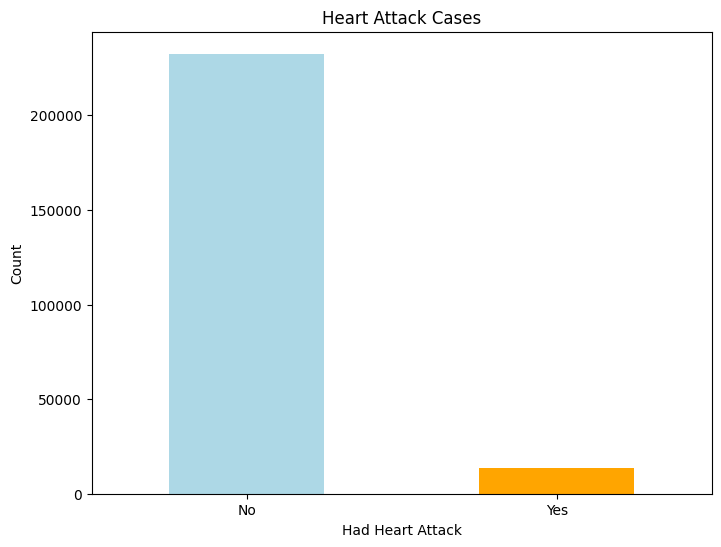

In [7]:
print("Heart Attack Distribution:")
print(df['HadHeartAttack'].value_counts())
print(f"\nPercentages:")
print(df['HadHeartAttack'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 6))
df['HadHeartAttack'].value_counts().plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Heart Attack Cases')
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
# looking at key variables from Q1
key_vars_q1 = ['HadDiabetes', 'HadStroke', 'GeneralHealth', 'AgeCategory', 'Sex', 'BMI']

print("Diabetes vs Heart Attack:")
crosstab_diabetes = pd.crosstab(df['HadDiabetes'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_diabetes)

print("\nStroke vs Heart Attack:")
crosstab_stroke = pd.crosstab(df['HadStroke'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_stroke)

print("\nGeneral Health vs Heart Attack:")
crosstab_health = pd.crosstab(df['GeneralHealth'], df['HadHeartAttack'], normalize='index') * 100
print(crosstab_health)

Diabetes vs Heart Attack:
HadHeartAttack                                  No        Yes
HadDiabetes                                                  
No                                       95.931828   4.068172
No, pre-diabetes or borderline diabetes  92.729970   7.270030
Yes                                      86.236063  13.763937
Yes, but only during pregnancy (female)  97.175996   2.824004

Stroke vs Heart Attack:
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             75.098892  24.901108

General Health vs Heart Attack:
HadHeartAttack         No        Yes
GeneralHealth                       
Excellent       98.569536   1.430464
Fair            87.775205  12.224795
Good            94.058830   5.941170
Poor            78.536585  21.463415
Very good       97.160887   2.839113
HadHeartAttack         No        Yes
GeneralHealth                       
Excellent       98.569536   1.430464
Fair            87.775205 

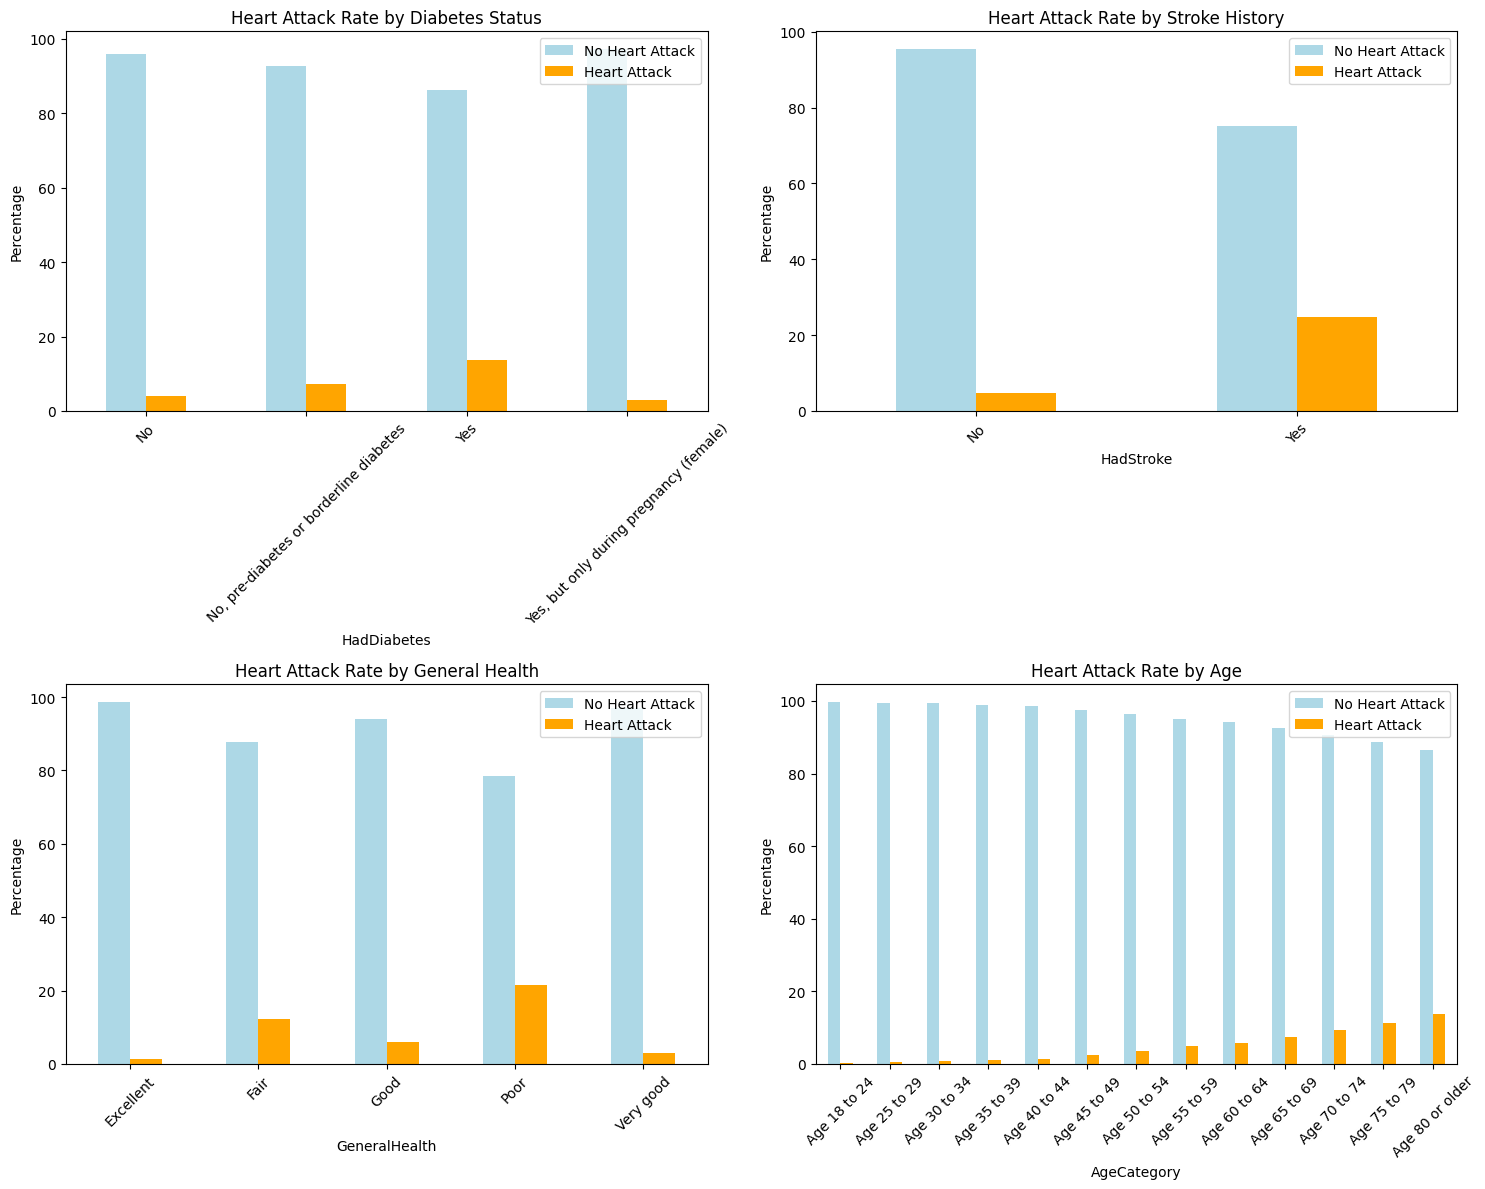

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# diabetes
ax1 = axes[0, 0]
diabetes_ha = pd.crosstab(df['HadDiabetes'], df['HadHeartAttack'], normalize='index') * 100
diabetes_ha.plot(kind='bar', ax=ax1, color=['lightblue', 'orange'])
ax1.set_title('Heart Attack Rate by Diabetes Status')
ax1.set_ylabel('Percentage')
ax1.legend(['No Heart Attack', 'Heart Attack'])
ax1.tick_params(axis='x', rotation=45)

# stroke
ax2 = axes[0, 1]
stroke_ha = pd.crosstab(df['HadStroke'], df['HadHeartAttack'], normalize='index') * 100
stroke_ha.plot(kind='bar', ax=ax2, color=['lightblue', 'orange'])
ax2.set_title('Heart Attack Rate by Stroke History')
ax2.set_ylabel('Percentage')
ax2.legend(['No Heart Attack', 'Heart Attack'])
ax2.tick_params(axis='x', rotation=45)

# general health
ax3 = axes[1, 0]
health_ha = pd.crosstab(df['GeneralHealth'], df['HadHeartAttack'], normalize='index') * 100
health_ha.plot(kind='bar', ax=ax3, color=['lightblue', 'orange'])
ax3.set_title('Heart Attack Rate by General Health')
ax3.set_ylabel('Percentage')
ax3.legend(['No Heart Attack', 'Heart Attack'])
ax3.tick_params(axis='x', rotation=45)

# age
ax4 = axes[1, 1]
age_ha = pd.crosstab(df['AgeCategory'], df['HadHeartAttack'], normalize='index') * 100
age_ha.plot(kind='bar', ax=ax4, color=['lightblue', 'orange'])
ax4.set_title('Heart Attack Rate by Age')
ax4.set_ylabel('Percentage')
ax4.legend(['No Heart Attack', 'Heart Attack'])
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Q2 EDA: Lifestyle & Chronic Conditions

In [10]:
# lifestyle and chronic conditions
lifestyle_vars = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities', 'SleepHours']
chronic_conditions = ['HadDiabetes', 'HadStroke', 'HadAsthma', 'HadKidneyDisease', 
                     'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadArthritis']

print("Smoking Status vs Heart Attack:")
smoking_ha = pd.crosstab(df['SmokerStatus'], df['HadHeartAttack'], normalize='index') * 100
print(smoking_ha)

print("\nAlcohol vs Heart Attack:")
alcohol_ha = pd.crosstab(df['AlcoholDrinkers'], df['HadHeartAttack'], normalize='index') * 100
print(alcohol_ha)

print("\nPhysical Activity vs Heart Attack:")
activity_ha = pd.crosstab(df['PhysicalActivities'], df['HadHeartAttack'], normalize='index') * 100
print(activity_ha)

Smoking Status vs Heart Attack:
HadHeartAttack                                No       Yes
SmokerStatus                                              
Current smoker - now smokes every day  91.684750  8.315250
Current smoker - now smokes some days  93.171997  6.828003
Former smoker                          91.813446  8.186554
Never smoked                           96.296798  3.703202

Alcohol vs Heart Attack:
HadHeartAttack          No       Yes
AlcoholDrinkers                     
No               92.675789  7.324211
Yes              96.063766  3.936234

Physical Activity vs Heart Attack:
HadHeartAttack             No       Yes
PhysicalActivities                     
No                  91.004314  8.995686
Yes                 95.549818  4.450182


In [11]:
# see which chronic conditions are most associated with heart attacks
print("Chronic Conditions vs Heart Attack:\n")
chronic_results = {}

for condition in chronic_conditions:
    if condition in df.columns:
        condition_ha = pd.crosstab(df[condition], df['HadHeartAttack'], normalize='index') * 100
        if 'Yes' in condition_ha.index:
            heart_attack_rate = condition_ha.loc['Yes', 'Yes'] if 'Yes' in condition_ha.columns else 0
            chronic_results[condition] = heart_attack_rate
            print(f"{condition}:")
            print(condition_ha)
            print()

# rank them
chronic_summary = pd.DataFrame(list(chronic_results.items()), 
                             columns=['Condition', 'Heart_Attack_Rate_%'])
chronic_summary = chronic_summary.sort_values('Heart_Attack_Rate_%', ascending=False)
print("Ranked by heart attack rate:")
print(chronic_summary)

Chronic Conditions vs Heart Attack:

HadDiabetes:
HadHeartAttack                                  No        Yes
HadDiabetes                                                  
No                                       95.931828   4.068172
No, pre-diabetes or borderline diabetes  92.729970   7.270030
Yes                                      86.236063  13.763937
Yes, but only during pregnancy (female)  97.175996   2.824004

HadStroke:
HadHeartAttack         No        Yes
HadStroke                           
No              95.372388   4.627612
Yes             75.098892  24.901108

HadAsthma:
HadHeartAttack         No       Yes
HadAsthma                          
No              94.764503  5.235497
Yes             93.246462  6.753538

HadKidneyDisease:
HadHeartAttack           No        Yes
HadKidneyDisease                      
No                95.083881   4.916119
Yes               83.206310  16.793690

HadSkinCancer:
HadHeartAttack         No       Yes
HadSkinCancer                      

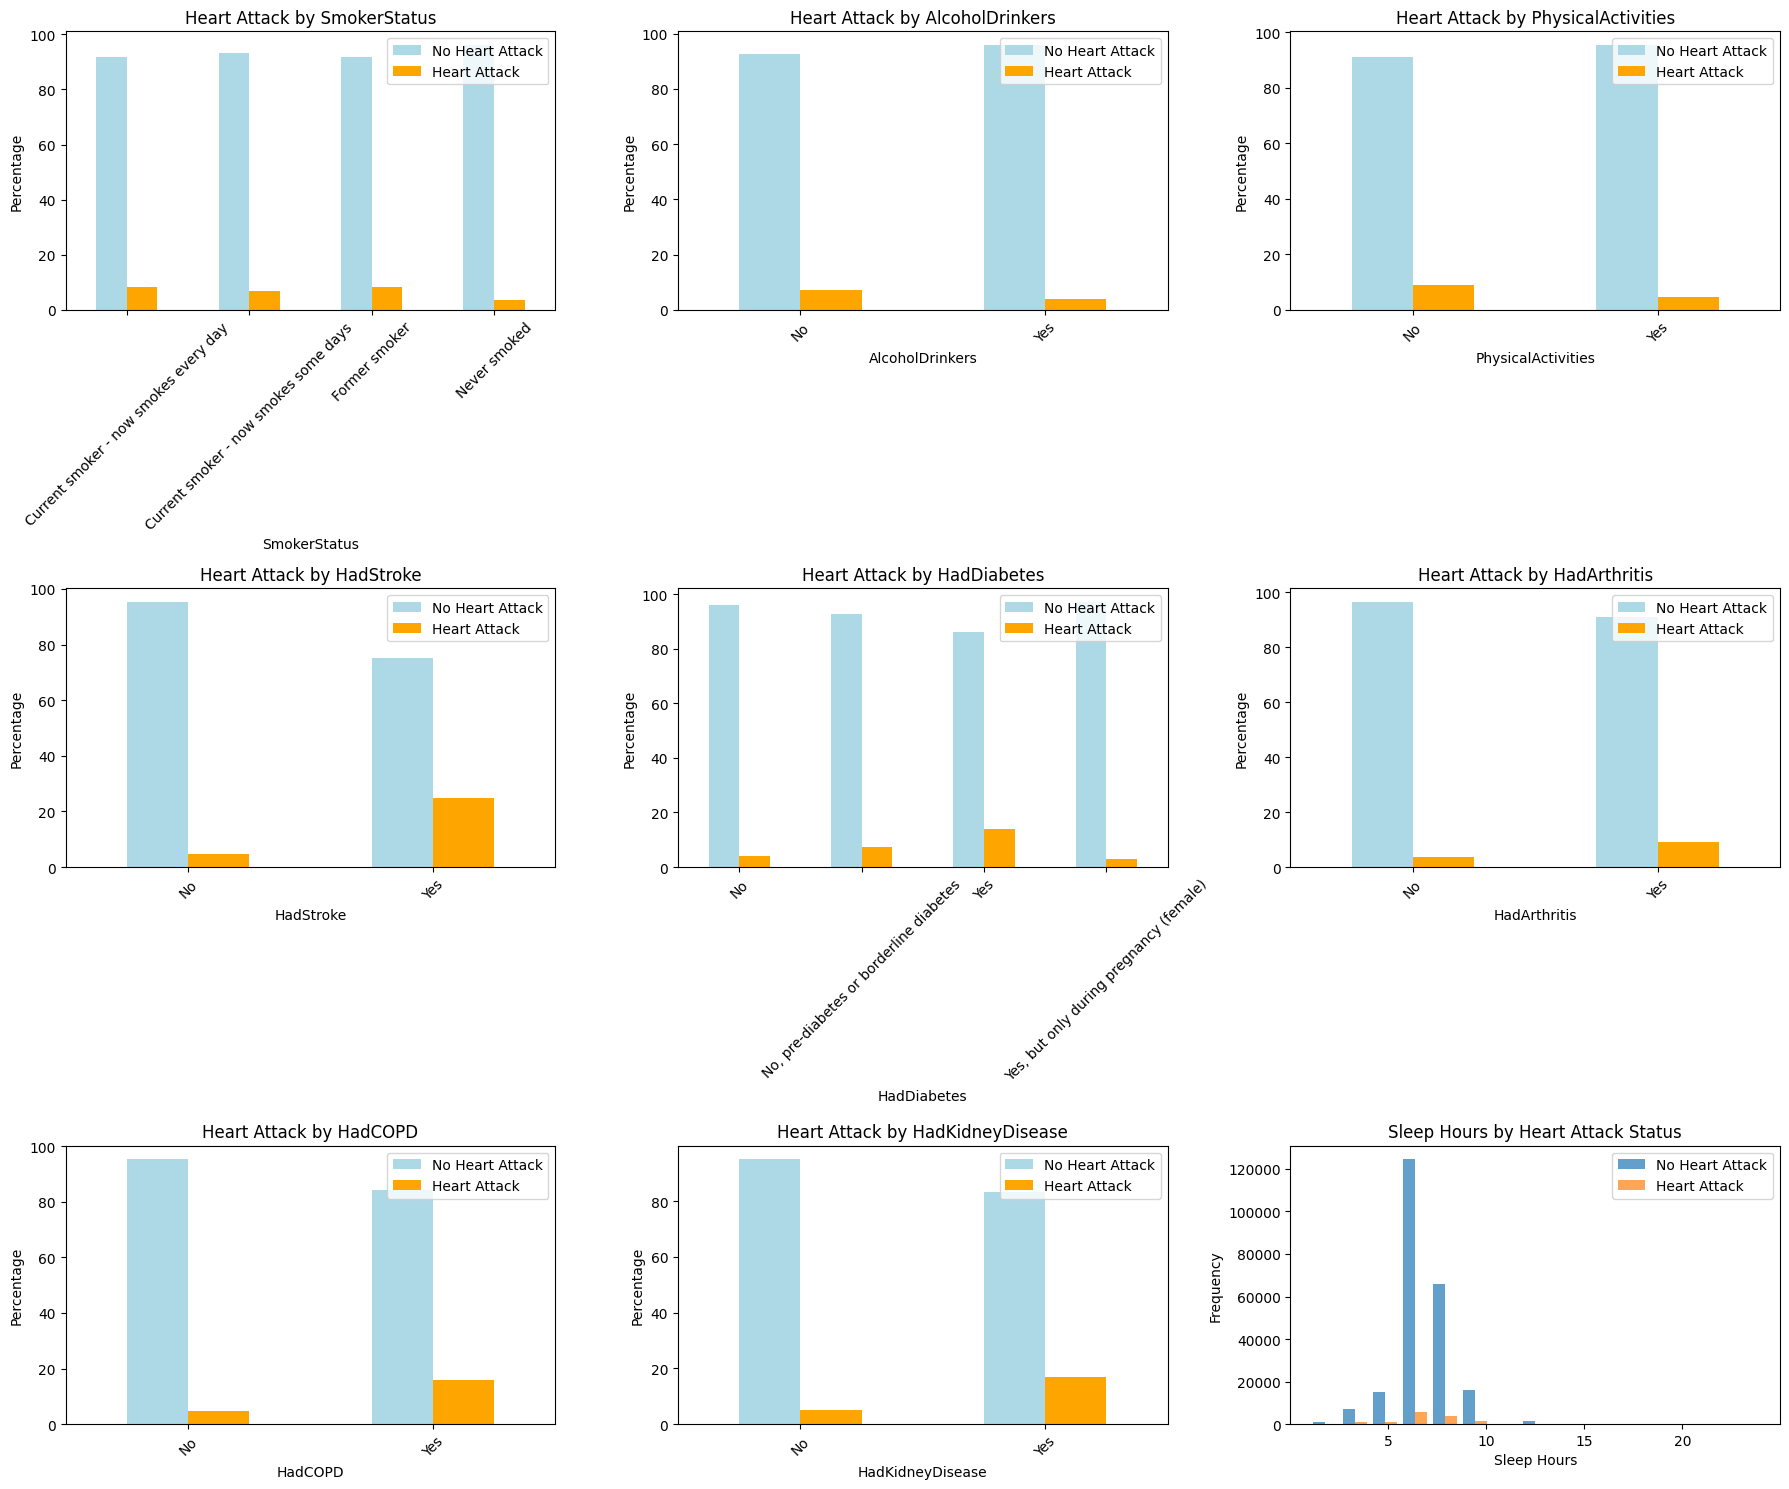

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# lifestyle
lifestyle_vars = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']
for i, var in enumerate(lifestyle_vars):
    var_ha = pd.crosstab(df[var], df['HadHeartAttack'], normalize='index') * 100
    var_ha.plot(kind='bar', ax=axes[i], color=['lightblue', 'orange'])
    axes[i].set_title(f'Heart Attack by {var}')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['No Heart Attack', 'Heart Attack'])
    axes[i].tick_params(axis='x', rotation=45)

# chronic conditions
top_chronic = ['HadStroke', 'HadDiabetes', 'HadArthritis', 'HadCOPD', 'HadKidneyDisease']
for i, condition in enumerate(top_chronic):
    if condition in df.columns:
        condition_ha = pd.crosstab(df[condition], df['HadHeartAttack'], normalize='index') * 100
        condition_ha.plot(kind='bar', ax=axes[i+3], color=['lightblue', 'orange'])
        axes[i+3].set_title(f'Heart Attack by {condition}')
        axes[i+3].set_ylabel('Percentage')
        axes[i+3].legend(['No Heart Attack', 'Heart Attack'])
        axes[i+3].tick_params(axis='x', rotation=45)

# sleep
axes[8].hist([df[df['HadHeartAttack']=='No']['SleepHours'], 
              df[df['HadHeartAttack']=='Yes']['SleepHours']], 
             alpha=0.7, label=['No Heart Attack', 'Heart Attack'], bins=15)
axes[8].set_title('Sleep Hours by Heart Attack Status')
axes[8].set_xlabel('Sleep Hours')
axes[8].set_ylabel('Frequency')
axes[8].legend()

plt.tight_layout()
plt.show()

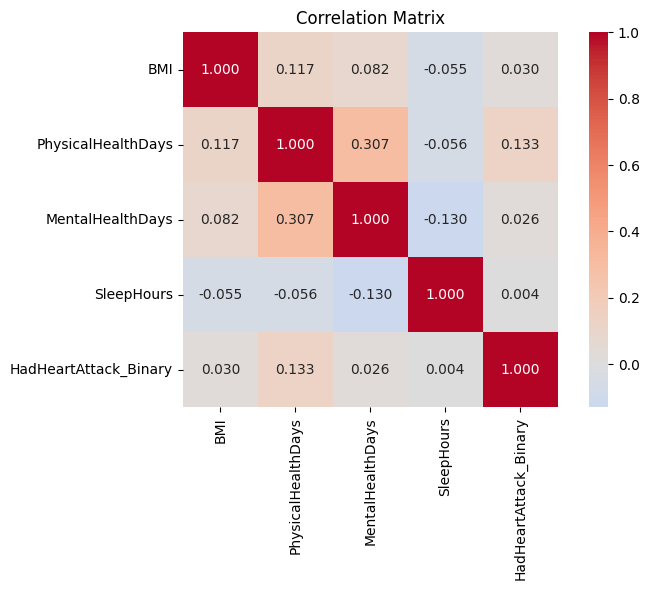

Correlations with Heart Attack:
PhysicalHealthDays    0.133420
BMI                   0.030413
MentalHealthDays      0.025892
SleepHours            0.003631
Name: HadHeartAttack_Binary, dtype: float64


In [13]:
# correlations for numeric variables
numeric_for_corr = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

df_corr = df.copy()
df_corr['HadHeartAttack_Binary'] = (df_corr['HadHeartAttack'] == 'Yes').astype(int)

corr_matrix = df_corr[numeric_for_corr + ['HadHeartAttack_Binary']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

print("Correlations with Heart Attack:")
correlations = corr_matrix['HadHeartAttack_Binary'].drop('HadHeartAttack_Binary').sort_values(key=abs, ascending=False)
print(correlations)

## Data Preprocessing

Encoding categorical variables for modeling.

In [14]:
from sklearn.preprocessing import LabelEncoder

df_model = df.copy()

# convert target to binary
df_model['HadHeartAttack'] = (df_model['HadHeartAttack'] == 'Yes').astype(int)

print("Target converted to binary:")
print(df_model['HadHeartAttack'].value_counts())

# get categorical columns
categorical_cols = df_model.select_dtypes(include=['object']).columns.tolist()
print(f"\n{len(categorical_cols)} categorical columns to encode:")
print(categorical_cols)

# encode them
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le
    print(f"Encoded {col}: {len(le.classes_)} unique values")

print(f"\nDone! Shape: {df_model.shape}")

Target converted to binary:
HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

33 categorical columns to encode:
['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Encoded State: 54 unique values
Encoded Sex: 2 unique values
Encoded GeneralHealth: 5 unique values
Encoded LastCheckupTime: 4 unique values
Encoded PhysicalActivities: 2 unique values
Encoded RemovedTeeth: 4 unique values

33 categorical columns to encode:
['State', 'Sex', 'General

In [15]:
# quick check
print(df_model.info())
print(f"\nFirst few rows:")
print(df_model.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  int64  
 1   Sex                        246022 non-null  int64  
 2   GeneralHealth              246022 non-null  int64  
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  int64  
 6   PhysicalActivities         246022 non-null  int64  
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  int64  
 9   HadHeartAttack             246022 non-null  int64  
 10  HadAngina                  246022 non-null  int64  
 11  HadStroke                  246022 non-null  int64  
 12  HadAsthma                  246022 non-null  int64  
 13  HadSkinCancer              24

In [16]:
# train/test split and correlation analysis

In [17]:
from sklearn.model_selection import train_test_split

X = df_model.drop('HadHeartAttack', axis=1)
y = df_model['HadHeartAttack']

print(f"X: {X.shape}, y: {y.shape}")

# 80/20 split, stratified
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain: {X_train.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

print(f"\nTrain class distribution:")
print(y_train.value_counts(normalize=True) * 100)
print(f"\nTest class distribution:")
print(y_test.value_counts(normalize=True) * 100)

X: (246022, 39), y: (246022,)

Train: 196817 samples
Test: 49205 samples

Train class distribution:
HadHeartAttack
0    94.53909
1     5.46091
Name: proportion, dtype: float64

Test class distribution:
HadHeartAttack
0    94.539173
1     5.460827
Name: proportion, dtype: float64

Train: 196817 samples
Test: 49205 samples

Train class distribution:
HadHeartAttack
0    94.53909
1     5.46091
Name: proportion, dtype: float64

Test class distribution:
HadHeartAttack
0    94.539173
1     5.460827
Name: proportion, dtype: float64


In [18]:
# correlation analysis on training set only (avoid data leakage)
train_data = X_train.copy()
train_data['HadHeartAttack'] = y_train

corrs = train_data.corr()['HadHeartAttack'].drop('HadHeartAttack').sort_values(key=abs, ascending=False)

print("Top 15 features by correlation with target:\n")
top15_corrs = corrs.head(15)
for i, (feature, corr_val) in enumerate(top15_corrs.items(), 1):
    print(f"{i:2d}. {feature:40} r = {corr_val:.4f}")

Top 15 features by correlation with target:

 1. HadAngina                                r = 0.4472
 2. HadStroke                                r = 0.1793
 3. AgeCategory                              r = 0.1724
 4. ChestScan                                r = 0.1662
 5. DifficultyWalking                        r = 0.1595
 6. HadDiabetes                              r = 0.1365
 7. HadCOPD                                  r = 0.1338
 8. PhysicalHealthDays                       r = 0.1327
 9. PneumoVaxEver                            r = 0.1204
10. HadArthritis                             r = 0.1165
11. HadKidneyDisease                         r = 0.1093
12. DeafOrHardOfHearing                      r = 0.0975
13. DifficultyErrands                        r = 0.0912
14. DifficultyDressingBathing                r = 0.0844
15. PhysicalActivities                       r = -0.0839


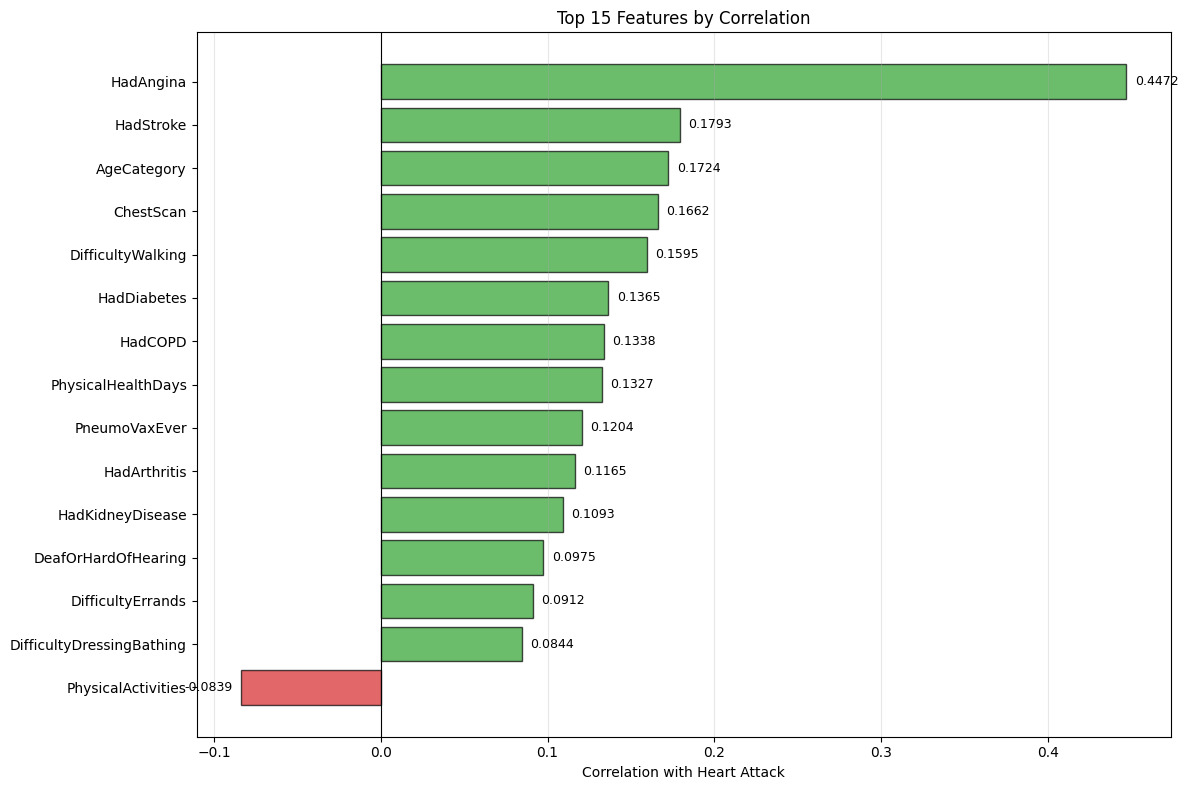

In [19]:
# visualize top correlations
fig, ax = plt.subplots(figsize=(12, 8))

top15_features = top15_corrs.head(15)
features = top15_features.index
values = top15_features.values

colors_bar = ['#d62728' if v < 0 else '#2ca02c' for v in values]
bars = ax.barh(range(len(features)), values, color=colors_bar, alpha=0.7, edgecolor='black')

ax.set_yticks(range(len(features)))
ax.set_yticklabels(features, fontsize=10)
ax.set_xlabel('Correlation with Heart Attack')
ax.set_title('Top 15 Features by Correlation')
ax.axvline(0, color='black', linewidth=0.8)
ax.grid(alpha=0.3, axis='x')

for i, (bar, val) in enumerate(zip(bars, values)):
    label_x = val + (0.005 if val > 0 else -0.005)
    ha = 'left' if val > 0 else 'right'
    ax.text(label_x, bar.get_y() + bar.get_height()/2, f'{val:.4f}', 
            ha=ha, va='center', fontsize=9)

ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [20]:
# naive baseline - just predict the most common class

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, classification_report
)

# always predict the majority class
naive_model = DummyClassifier(strategy='most_frequent', random_state=42)
naive_model.fit(X_train, y_train)

y_pred_naive = naive_model.predict(X_test)
y_pred_proba_naive = naive_model.predict_proba(X_test)[:, 1]

print("Naive Baseline (always predict majority class)")
print(f"Predicts 'No Heart Attack': {np.sum(y_pred_naive == 0):,}")
print(f"Predicts 'Heart Attack': {np.sum(y_pred_naive == 1):,}")

Naive Baseline (always predict majority class)
Predicts 'No Heart Attack': 49,205
Predicts 'Heart Attack': 0


In [22]:
# baseline metrics
naive_accuracy = accuracy_score(y_test, y_pred_naive)
naive_precision = precision_score(y_test, y_pred_naive, zero_division=0)
naive_recall = recall_score(y_test, y_pred_naive, zero_division=0)
naive_f1 = f1_score(y_test, y_pred_naive, zero_division=0)
naive_auc = roc_auc_score(y_test, y_pred_proba_naive)

print("Naive Baseline Performance:\n")
print(f"Accuracy:  {naive_accuracy:.4f}")
print(f"Precision: {naive_precision:.4f}")
print(f"Recall:    {naive_recall:.4f}")
print(f"F1:        {naive_f1:.4f}")
print(f"AUC:       {naive_auc:.4f}")

print("\n" + classification_report(y_test, y_pred_naive, 
                          target_names=['No HA', 'HA'],
                          zero_division=0))

Naive Baseline Performance:

Accuracy:  0.9454
Precision: 0.0000
Recall:    0.0000
F1:        0.0000
AUC:       0.5000

              precision    recall  f1-score   support

       No HA       0.95      1.00      0.97     46518
          HA       0.00      0.00      0.00      2687

    accuracy                           0.95     49205
   macro avg       0.47      0.50      0.49     49205
weighted avg       0.89      0.95      0.92     49205



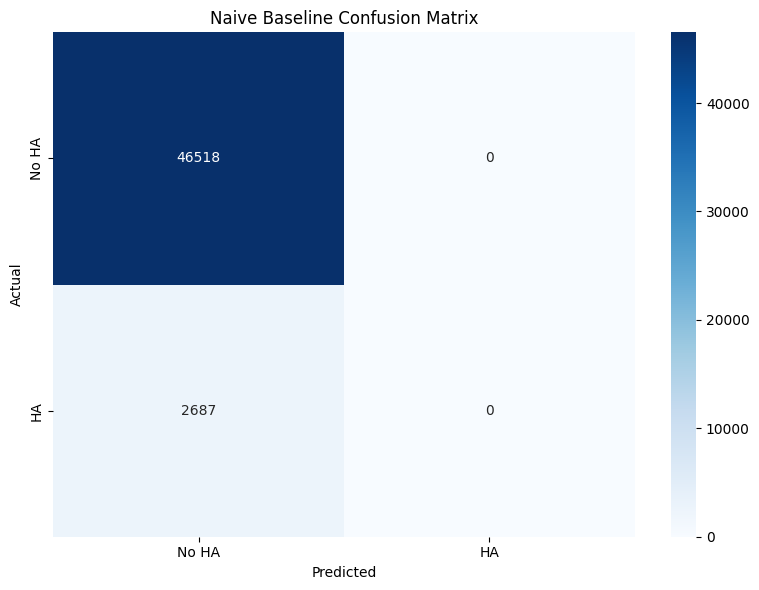

TN: 46,518 | FP: 0
FN: 2,687 | TP: 0


In [23]:
cm_naive = confusion_matrix(y_test, y_pred_naive)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_naive, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No HA', 'HA'],
            yticklabels=['No HA', 'HA'])
plt.title('Naive Baseline Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print(f"TN: {cm_naive[0, 0]:,} | FP: {cm_naive[0, 1]:,}")
print(f"FN: {cm_naive[1, 0]:,} | TP: {cm_naive[1, 1]:,}")

### About the Naive Baseline

This model just always predicts "No Heart Attack" since that's 94.5% of the data.

- Accuracy looks good at ~94.5% but it's useless
- Recall = 0 because it never catches any actual heart attacks
- AUC = 0.5 (random guessing)

Any real model needs to beat this by actually identifying some heart attack cases.

## V1: Simple Model (Top 3 Features)

### Logistic Regression

The model predicts log-odds of heart attack:

$$\log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p$$

Using `class_weight='balanced'` to handle the class imbalance.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# use top 3 correlated features
top3_features = corrs.head(3).index.tolist()

print("V1 Model - Top 3 Features:\n")
for i, (feature, corr_val) in enumerate(zip(top3_features, corrs.head(3).values), 1):
    print(f"{i}. {feature}: r = {corr_val:.4f}")

X_train_v1 = X_train[top3_features]
X_test_v1 = X_test[top3_features]
print(f"\nTrain: {X_train_v1.shape}, Test: {X_test_v1.shape}")

V1 Model - Top 3 Features:

1. HadAngina: r = 0.4472
2. HadStroke: r = 0.1793
3. AgeCategory: r = 0.1724

Train: (196817, 3), Test: (49205, 3)


In [25]:
# scale features
scaler_v1 = StandardScaler()
X_train_v1_scaled = scaler_v1.fit_transform(X_train_v1)
X_test_v1_scaled = scaler_v1.transform(X_test_v1)

print("Scaling stats from training data:")
for i, feature in enumerate(top3_features):
    print(f"  {feature}: mean={scaler_v1.mean_[i]:.4f}, std={scaler_v1.scale_[i]:.4f}")

Scaling stats from training data:
  HadAngina: mean=0.0609, std=0.2392
  HadStroke: mean=0.0411, std=0.1986
  AgeCategory: mean=6.7222, std=3.4646


In [26]:
# fit logistic regression
model_v1 = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

model_v1.fit(X_train_v1_scaled, y_train)
print("Model fitted!")

Model fitted!


In [27]:
# evaluate
y_pred_v1 = model_v1.predict(X_test_v1_scaled)
y_pred_proba_v1 = model_v1.predict_proba(X_test_v1_scaled)[:, 1]

v1_accuracy = accuracy_score(y_test, y_pred_v1)
v1_precision = precision_score(y_test, y_pred_v1, zero_division=0)
v1_recall = recall_score(y_test, y_pred_v1, zero_division=0)
v1_f1 = f1_score(y_test, y_pred_v1, zero_division=0)
v1_auc = roc_auc_score(y_test, y_pred_proba_v1)

print("V1 Performance:\n")
print(f"Accuracy:  {v1_accuracy:.4f}")
print(f"Precision: {v1_precision:.4f}")
print(f"Recall:    {v1_recall:.4f}")
print(f"F1:        {v1_f1:.4f}")
print(f"AUC:       {v1_auc:.4f}")

print("\n" + classification_report(y_test, y_pred_v1, 
                          target_names=['No HA', 'HA'],
                          zero_division=0))

# compare to baseline
print("\nImprovement over baseline:")
print(f"  AUC: {naive_auc:.4f} -> {v1_auc:.4f} (+{v1_auc-naive_auc:.4f})")
print(f"  Recall: {naive_recall:.4f} -> {v1_recall:.4f} (+{v1_recall-naive_recall:.4f})")

V1 Performance:

Accuracy:  0.8733
Precision: 0.2462
Recall:    0.6397
F1:        0.3555
AUC:       0.8455

              precision    recall  f1-score   support

       No HA       0.98      0.89      0.93     46518
          HA       0.25      0.64      0.36      2687

    accuracy                           0.87     49205
   macro avg       0.61      0.76      0.64     49205
weighted avg       0.94      0.87      0.90     49205


Improvement over baseline:
  AUC: 0.5000 -> 0.8455 (+0.3455)
  Recall: 0.0000 -> 0.6397 (+0.6397)

              precision    recall  f1-score   support

       No HA       0.98      0.89      0.93     46518
          HA       0.25      0.64      0.36      2687

    accuracy                           0.87     49205
   macro avg       0.61      0.76      0.64     49205
weighted avg       0.94      0.87      0.90     49205


Improvement over baseline:
  AUC: 0.5000 -> 0.8455 (+0.3455)
  Recall: 0.0000 -> 0.6397 (+0.6397)


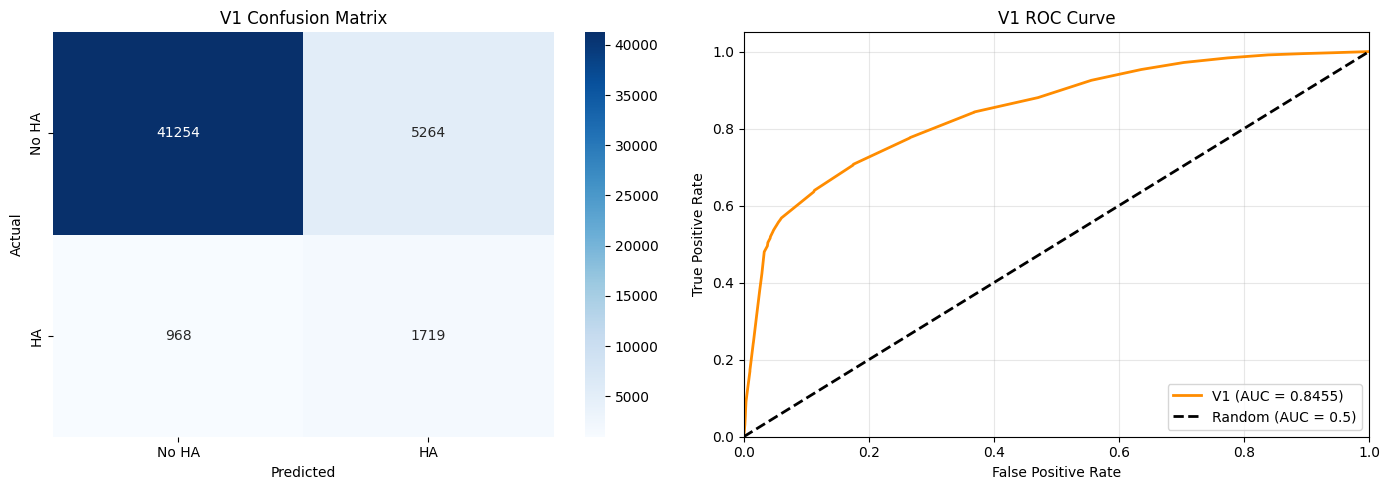

TN: 41,254 | FP: 5,264
FN: 968 | TP: 1,719


In [28]:
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# confusion matrix
cm_v1 = confusion_matrix(y_test, y_pred_v1)
sns.heatmap(cm_v1, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No HA', 'HA'],
            yticklabels=['No HA', 'HA'])
axes[0].set_title('V1 Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# ROC curve
fpr_v1, tpr_v1, _ = roc_curve(y_test, y_pred_proba_v1)
roc_auc_v1 = auc(fpr_v1, tpr_v1)

axes[1].plot(fpr_v1, tpr_v1, color='darkorange', lw=2, label=f'V1 (AUC = {roc_auc_v1:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.5)')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('V1 ROC Curve')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"TN: {cm_v1[0, 0]:,} | FP: {cm_v1[0, 1]:,}")
print(f"FN: {cm_v1[1, 0]:,} | TP: {cm_v1[1, 1]:,}")

In [29]:
# feature coefficients
coefficients_v1 = model_v1.coef_[0]
intercept_v1 = model_v1.intercept_[0]

coef_df_v1 = pd.DataFrame({
    'Feature': top3_features,
    'Coefficient': coefficients_v1,
    'Odds_Ratio': np.exp(coefficients_v1)
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"Intercept: {intercept_v1:.4f}\n")
print("Coefficients:")
for _, row in coef_df_v1.iterrows():
    print(f"  {row['Feature']:30} coef={row['Coefficient']:8.4f}  OR={row['Odds_Ratio']:.4f}")

print("\nPositive coef = increases risk, Negative = decreases risk")

Intercept: -0.7962

Coefficients:
  AgeCategory                    coef=  0.7992  OR=2.2237
  HadAngina                      coef=  0.7152  OR=2.0446
  HadStroke                      coef=  0.3110  OR=1.3648

Positive coef = increases risk, Negative = decreases risk


In [30]:
# statsmodels for p-values
import statsmodels.api as sm

X_train_v1_scaled_sm = sm.add_constant(X_train_v1_scaled)

logit_model_v1 = sm.Logit(y_train, X_train_v1_scaled_sm)
logit_result_v1 = logit_model_v1.fit()

print(logit_result_v1.summary())

print(f"\nAIC: {logit_result_v1.aic:.2f}")
print(f"BIC: {logit_result_v1.bic:.2f}")

print("\nP-values:")
feature_names = ['Intercept'] + top3_features
for name, pval in zip(feature_names, logit_result_v1.pvalues):
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else ""
    print(f"  {name:30} p = {pval:.4e} {sig}")

Optimization terminated successfully.
         Current function value: 0.155258
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         HadHeartAttack   No. Observations:               196817
Model:                          Logit   Df Residuals:                   196813
Method:                           MLE   Df Model:                            3
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.2672
Time:                        15:32:24   Log-Likelihood:                -30557.
converged:                       True   LL-Null:                       -41699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5371      0.016   -227.909      0.000      -3.568      -3.507
x1             0.6862      0.

### AIC/BIC for Model Selection

We use AIC and BIC to compare models:
- Both penalize complexity (more features = higher penalty)
- Both reward better fit
- Lower = better

AIC is less strict about complexity, BIC penalizes more (especially with large n).

In [31]:
# cross-validation for V1
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

v1_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scoring_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]
cv_results_v1 = {}

print("V1 Cross-Validation (5-fold):\n")
for metric in cv_scoring_metrics:
    scores = cross_val_score(v1_pipeline, X_train_v1, y_train, cv=cv, scoring=metric, n_jobs=-1)
    cv_results_v1[metric] = {"mean": scores.mean(), "std": scores.std(), "scores": scores}
    print(f"{metric:12} {scores.mean():.4f} (+/- {scores.std():.4f})")

print(f"\nCV is {'stable' if cv_results_v1['roc_auc']['std'] < 0.05 else 'variable'} across folds")

V1 Cross-Validation (5-fold):

accuracy     0.8709 (+/- 0.0018)
accuracy     0.8709 (+/- 0.0018)
precision    0.2449 (+/- 0.0034)
precision    0.2449 (+/- 0.0034)
recall       0.6546 (+/- 0.0074)
recall       0.6546 (+/- 0.0074)
f1           0.3564 (+/- 0.0042)
f1           0.3564 (+/- 0.0042)
roc_auc      0.8499 (+/- 0.0036)

CV is stable across folds
roc_auc      0.8499 (+/- 0.0036)

CV is stable across folds


## V2: Forward Selection Model

Using sklearn's SequentialFeatureSelector to pick features that improve AUC.

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, auc)
import statsmodels.api as sm

print("V2 - Forward Feature Selection\n")

estimator = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Running forward selection (this takes a bit)...")
sfs = SequentialFeatureSelector(
    estimator,
    direction='forward',
    scoring='roc_auc',
    cv=cv_strategy,
    n_jobs=-1
)

sfs.fit(X_train, y_train)

selected_features = X_train.columns[sfs.get_support()].tolist()
print(f"\nSelected {len(selected_features)} features:")
for i, f in enumerate(selected_features, 1):
    print(f"  {i}. {f}")

# fit final model
final_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])
final_pipeline.fit(X_train[selected_features], y_train)

y_pred_v2 = final_pipeline.predict(X_test[selected_features])
y_proba_v2 = final_pipeline.predict_proba(X_test[selected_features])[:, 1]

metrics = {
    'accuracy': accuracy_score(y_test, y_pred_v2),
    'precision': precision_score(y_test, y_pred_v2, zero_division=0),
    'recall': recall_score(y_test, y_pred_v2, zero_division=0),
    'f1': f1_score(y_test, y_pred_v2, zero_division=0),
    'roc_auc': roc_auc_score(y_test, y_proba_v2)
}

print("\nV2 Performance:")
for k, v in metrics.items():
    print(f"  {k}: {v:.4f}")

print("\n" + classification_report(y_test, y_pred_v2, target_names=['No HA', 'HA'], zero_division=0))

V2 - Forward Feature Selection

Running forward selection (this takes a bit)...

Selected 19 features:
  1. Sex
  2. PhysicalHealthDays
  3. LastCheckupTime
  4. PhysicalActivities
  5. RemovedTeeth
  6. HadAngina
  7. HadStroke
  8. HadCOPD
  9. HadKidneyDisease
  10. HadDiabetes
  11. DeafOrHardOfHearing
  12. BlindOrVisionDifficulty
  13. DifficultyConcentrating
  14. DifficultyWalking
  15. SmokerStatus
  16. ChestScan
  17. AgeCategory
  18. AlcoholDrinkers
  19. FluVaxLast12

V2 Performance:
  accuracy: 0.8345
  precision: 0.2136
  recall: 0.7570
  f1: 0.3332
  roc_auc: 0.8816

              precision    recall  f1-score   support

       No HA       0.98      0.84      0.91     46518
          HA       0.21      0.76      0.33      2687

    accuracy                           0.83     49205
   macro avg       0.60      0.80      0.62     49205
weighted avg       0.94      0.83      0.87     49205


Selected 19 features:
  1. Sex
  2. PhysicalHealthDays
  3. LastCheckupTime
  4. 

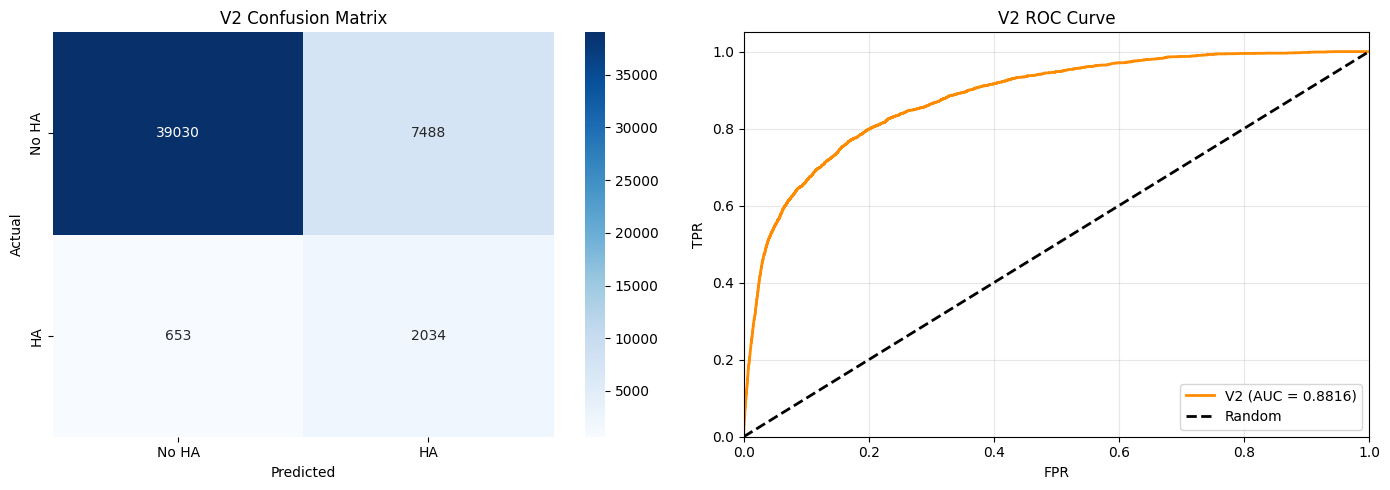

TN: 39,030 | FP: 7,488
FN: 653 | TP: 2,034


In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# confusion matrix
cm_v2 = confusion_matrix(y_test, y_pred_v2)
sns.heatmap(cm_v2, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No HA', 'HA'], yticklabels=['No HA', 'HA'])
axes[0].set_title('V2 Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# ROC
fpr_v2, tpr_v2, _ = roc_curve(y_test, y_proba_v2)
roc_auc_v2 = auc(fpr_v2, tpr_v2)

axes[1].plot(fpr_v2, tpr_v2, color='darkorange', lw=2, label=f'V2 (AUC = {roc_auc_v2:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')
axes[1].set_title('V2 ROC Curve')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"TN: {cm_v2[0, 0]:,} | FP: {cm_v2[0, 1]:,}")
print(f"FN: {cm_v2[1, 0]:,} | TP: {cm_v2[1, 1]:,}")

In [34]:
# statsmodels for AIC/BIC
scaler_v2 = StandardScaler()
X_train_v2_scaled = scaler_v2.fit_transform(X_train[selected_features])
X_test_v2_scaled = scaler_v2.transform(X_test[selected_features])

X_train_v2_scaled_sm = sm.add_constant(X_train_v2_scaled)

logit_model_v2 = sm.Logit(y_train, X_train_v2_scaled_sm)
logit_result_v2 = logit_model_v2.fit()

print(logit_result_v2.summary())

print(f"\nAIC: {logit_result_v2.aic:.2f}")
print(f"BIC: {logit_result_v2.bic:.2f}")

print("\nP-values:")
feature_names = ['Intercept'] + selected_features
for name, pval in zip(feature_names, logit_result_v2.pvalues):
    sig = "***" if pval < 0.001 else "**" if pval < 0.01 else "*" if pval < 0.05 else ""
    print(f"  {name:35} p = {pval:.4e} {sig}")

Optimization terminated successfully.
         Current function value: 0.146665
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         HadHeartAttack   No. Observations:               196817
Model:                          Logit   Df Residuals:                   196797
Method:                           MLE   Df Model:                           19
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.3078
Time:                        15:35:08   Log-Likelihood:                -28866.
converged:                       True   LL-Null:                       -41699.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7737      0.018   -209.615      0.000      -3.809      -3.738
x1             0.3261      0.

In [35]:
# V2 cross-validation
from sklearn.model_selection import cross_val_score

v2_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_v2 = {}

print(f"V2 Cross-Validation ({len(selected_features)} features):\n")
for metric in cv_scoring_metrics:
    scores = cross_val_score(v2_pipeline, X_train[selected_features], y_train, cv=cv, scoring=metric, n_jobs=-1)
    cv_results_v2[metric] = {'mean': scores.mean(), 'std': scores.std(), 'scores': scores}
    print(f"{metric:12} {scores.mean():.4f} (+/- {scores.std():.4f})")

print(f"\nCV is {'stable' if cv_results_v2['roc_auc']['std'] < 0.05 else 'variable'} across folds")

V2 Cross-Validation (19 features):

accuracy     0.8341 (+/- 0.0019)
accuracy     0.8341 (+/- 0.0019)
precision    0.2138 (+/- 0.0026)
precision    0.2138 (+/- 0.0026)
recall       0.7608 (+/- 0.0074)
recall       0.7608 (+/- 0.0074)
f1           0.3338 (+/- 0.0037)
f1           0.3338 (+/- 0.0037)
roc_auc      0.8866 (+/- 0.0021)

CV is stable across folds
roc_auc      0.8866 (+/- 0.0021)

CV is stable across folds


## V3: Lasso (L1) Regularization

L1 regularization automatically zeros out unimportant features.

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

print("V3 - Lasso Logistic Regression\n")
print(f"Using all {X_train.shape[1]} features")

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LogisticRegression(
        penalty='l1',
        solver='saga',
        class_weight='balanced',
        max_iter=5000,
        random_state=42
    ))
])

# tune C (smaller = stronger regularization)
param_grid = {'lasso__C': [0.001, 0.01, 0.1, 1, 10]}
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Tuning C parameter...")
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=cv_strategy, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nBest C: {grid_search.best_params_['lasso__C']}")
print(f"Best CV AUC: {grid_search.best_score_:.4f}")

print("\nResults for all C values:")
cv_results_df = pd.DataFrame(grid_search.cv_results_)
for idx, row in cv_results_df.iterrows():
    print(f"  C = {row['param_lasso__C']:6.3f} -> AUC: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")

best_lasso_model = grid_search.best_estimator_
best_C = grid_search.best_params_['lasso__C']

V3 - Lasso Logistic Regression

Using all 39 features
Tuning C parameter...
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best C: 0.001
Best CV AUC: 0.8406

Results for all C values:
  C =  0.001 -> AUC: 0.8406 (+/- 0.0019)
  C =  0.010 -> AUC: 0.8336 (+/- 0.0016)
  C =  0.100 -> AUC: 0.8327 (+/- 0.0015)
  C =  1.000 -> AUC: 0.8326 (+/- 0.0014)
  C = 10.000 -> AUC: 0.8326 (+/- 0.0014)

Best C: 0.001
Best CV AUC: 0.8406

Results for all C values:
  C =  0.001 -> AUC: 0.8406 (+/- 0.0019)
  C =  0.010 -> AUC: 0.8336 (+/- 0.0016)
  C =  0.100 -> AUC: 0.8327 (+/- 0.0015)
  C =  1.000 -> AUC: 0.8326 (+/- 0.0014)
  C = 10.000 -> AUC: 0.8326 (+/- 0.0014)


In [37]:
# which features did lasso keep?
lasso_model = best_lasso_model.named_steps['lasso']
lasso_coefficients = lasso_model.coef_[0]
feature_names = X_train.columns

non_zero_mask = lasso_coefficients != 0
non_zero_features = feature_names[non_zero_mask].tolist()
zero_features = feature_names[~non_zero_mask].tolist()
non_zero_coefs = lasso_coefficients[non_zero_mask]

print(f"Total features: {len(feature_names)}")
print(f"Selected: {len(non_zero_features)}")
print(f"Eliminated: {len(zero_features)}")

# show selected features sorted by importance
selected_coef_df = pd.DataFrame({
    'Feature': non_zero_features,
    'Coefficient': non_zero_coefs,
    'Odds_Ratio': np.exp(non_zero_coefs)
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nSelected features (by |coef|):")
for _, row in selected_coef_df.iterrows():
    print(f"  {row['Feature']:40} coef={row['Coefficient']:8.4f}  OR={row['Odds_Ratio']:.4f}")

if len(zero_features) > 0:
    print(f"\nDropped features:")
    for feat in zero_features:
        print(f"  {feat}")

lasso_selected_features = non_zero_features

Total features: 39
Selected: 27
Eliminated: 12

Selected features (by |coef|):
  AgeCategory                              coef=  0.6305  OR=1.8786
  HadAngina                                coef=  0.6177  OR=1.8546
  ChestScan                                coef=  0.3386  OR=1.4030
  Sex                                      coef=  0.2881  OR=1.3339
  HadStroke                                coef=  0.2088  OR=1.2322
  SmokerStatus                             coef= -0.1846  OR=0.8315
  HadDiabetes                              coef=  0.1606  OR=1.1743
  AlcoholDrinkers                          coef= -0.1189  OR=0.8879
  DifficultyWalking                        coef=  0.0842  OR=1.0879
  PhysicalHealthDays                       coef=  0.0696  OR=1.0721
  HadCOPD                                  coef=  0.0617  OR=1.0637
  LastCheckupTime                          coef=  0.0590  OR=1.0608
  PhysicalActivities                       coef= -0.0455  OR=0.9555
  RemovedTeeth                       

In [38]:
# V3 evaluation
y_pred_v3 = best_lasso_model.predict(X_test)
y_proba_v3 = best_lasso_model.predict_proba(X_test)[:, 1]

v3_accuracy = accuracy_score(y_test, y_pred_v3)
v3_precision = precision_score(y_test, y_pred_v3, zero_division=0)
v3_recall = recall_score(y_test, y_pred_v3, zero_division=0)
v3_f1 = f1_score(y_test, y_pred_v3, zero_division=0)
v3_auc = roc_auc_score(y_test, y_proba_v3)

metrics_v3 = {'accuracy': v3_accuracy, 'precision': v3_precision, 
              'recall': v3_recall, 'f1': v3_f1, 'roc_auc': v3_auc}

print("V3 Performance:\n")
print(f"Accuracy:  {v3_accuracy:.4f}")
print(f"Precision: {v3_precision:.4f}")
print(f"Recall:    {v3_recall:.4f}")
print(f"F1:        {v3_f1:.4f}")
print(f"AUC:       {v3_auc:.4f}")

print("\n" + classification_report(y_test, y_pred_v3, target_names=['No HA', 'HA'], zero_division=0))

# quick comparison
print("\nModel Comparison:")
print(f"{'Model':<20} {'AUC':>10} {'Recall':>10} {'# Features':>12}")
print("-" * 54)
print(f"{'V1 (Top 3)':<20} {v1_auc:>10.4f} {v1_recall:>10.4f} {len(top3_features):>12}")
print(f"{'V2 (Forward)':<20} {metrics['roc_auc']:>10.4f} {metrics['recall']:>10.4f} {len(selected_features):>12}")
print(f"{'V3 (Lasso)':<20} {v3_auc:>10.4f} {v3_recall:>10.4f} {len(lasso_selected_features):>12}")

V3 Performance:

Accuracy:  0.8397
Precision: 0.2177
Recall:    0.7462
F1:        0.3371
AUC:       0.8820

              precision    recall  f1-score   support

       No HA       0.98      0.85      0.91     46518
          HA       0.22      0.75      0.34      2687

    accuracy                           0.84     49205
   macro avg       0.60      0.80      0.62     49205
weighted avg       0.94      0.84      0.88     49205


Model Comparison:
Model                       AUC     Recall   # Features
------------------------------------------------------
V1 (Top 3)               0.8455     0.6397            3
V2 (Forward)             0.8816     0.7570           19
V3 (Lasso)               0.8820     0.7462           27


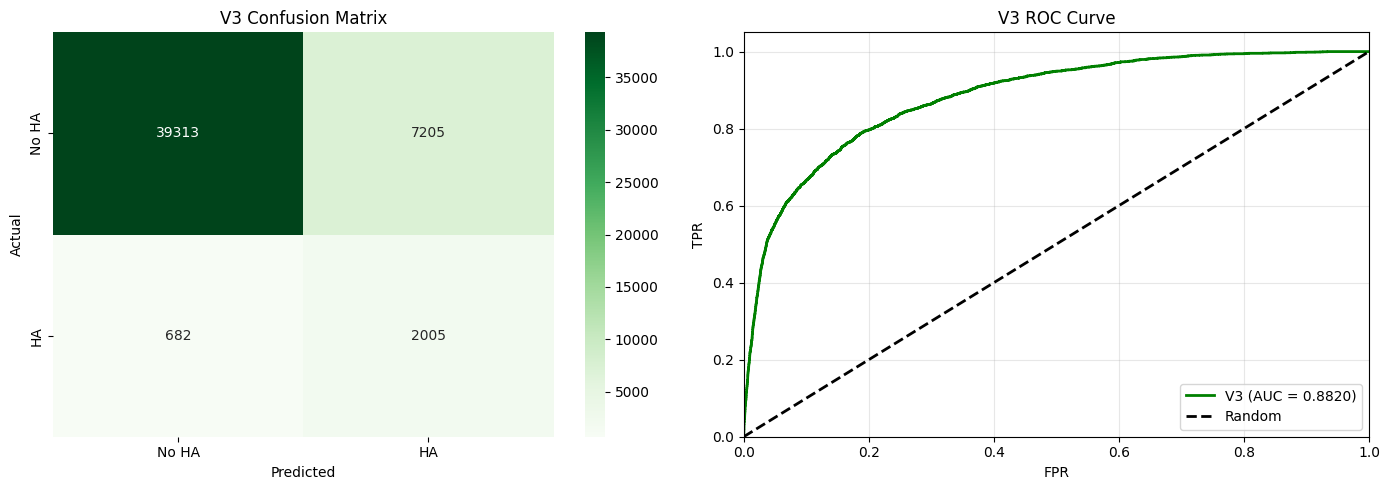

TN: 39,313 | FP: 7,205
FN: 682 | TP: 2,005


In [39]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# confusion matrix
cm_v3 = confusion_matrix(y_test, y_pred_v3)
sns.heatmap(cm_v3, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['No HA', 'HA'], yticklabels=['No HA', 'HA'])
axes[0].set_title('V3 Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# ROC
fpr_v3, tpr_v3, _ = roc_curve(y_test, y_proba_v3)
roc_auc_v3 = auc(fpr_v3, tpr_v3)

axes[1].plot(fpr_v3, tpr_v3, color='green', lw=2, label=f'V3 (AUC = {roc_auc_v3:.4f})')
axes[1].plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')
axes[1].set_title('V3 ROC Curve')
axes[1].legend(loc="lower right")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"TN: {cm_v3[0, 0]:,} | FP: {cm_v3[0, 1]:,}")
print(f"FN: {cm_v3[1, 0]:,} | TP: {cm_v3[1, 1]:,}")

In [40]:
# V3 cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_results_v3 = {}

print(f"V3 Cross-Validation (C={best_C}):\n")
for metric in cv_scoring_metrics:
    scores = cross_val_score(best_lasso_model, X_train, y_train, cv=cv, scoring=metric, n_jobs=-1)
    cv_results_v3[metric] = {'mean': scores.mean(), 'std': scores.std(), 'scores': scores}
    print(f"{metric:12} {scores.mean():.4f} (+/- {scores.std():.4f})")

print(f"\nCV is {'stable' if cv_results_v3['roc_auc']['std'] < 0.05 else 'variable'} across folds")

V3 Cross-Validation (C=0.001):

accuracy     0.8406 (+/- 0.0019)
accuracy     0.8406 (+/- 0.0019)
precision    0.2194 (+/- 0.0027)
precision    0.2194 (+/- 0.0027)
recall       0.7499 (+/- 0.0053)
recall       0.7499 (+/- 0.0053)
f1           0.3395 (+/- 0.0036)
f1           0.3395 (+/- 0.0036)
roc_auc      0.8866 (+/- 0.0022)

CV is stable across folds
roc_auc      0.8866 (+/- 0.0022)

CV is stable across folds


In [41]:
# compare feature selection methods
print("Feature Selection: V2 (Forward) vs V3 (Lasso)\n")
print(f"V2 selected: {len(selected_features)} features")
print(f"V3 selected: {len(lasso_selected_features)} features")

v2_set = set(selected_features)
v3_set = set(lasso_selected_features)

common = v2_set & v3_set
v2_only = v2_set - v3_set
v3_only = v3_set - v2_set

print(f"\nBoth methods picked ({len(common)}):")
for f in sorted(common):
    print(f"  {f}")

if v2_only:
    print(f"\nOnly V2 picked ({len(v2_only)}):")
    for f in sorted(v2_only):
        print(f"  {f}")

if v3_only:
    print(f"\nOnly V3 picked ({len(v3_only)}):")
    for f in sorted(v3_only):
        print(f"  {f}")

overlap_pct = len(common) / min(len(selected_features), len(lasso_selected_features)) * 100
print(f"\nOverlap: {overlap_pct:.1f}%")

Feature Selection: V2 (Forward) vs V3 (Lasso)

V2 selected: 19 features
V3 selected: 27 features

Both methods picked (19):
  AgeCategory
  AlcoholDrinkers
  BlindOrVisionDifficulty
  ChestScan
  DeafOrHardOfHearing
  DifficultyConcentrating
  DifficultyWalking
  FluVaxLast12
  HadAngina
  HadCOPD
  HadDiabetes
  HadKidneyDisease
  HadStroke
  LastCheckupTime
  PhysicalActivities
  PhysicalHealthDays
  RemovedTeeth
  Sex
  SmokerStatus

Only V3 picked (8):
  BMI
  DifficultyErrands
  GeneralHealth
  HadArthritis
  HadDepressiveDisorder
  MentalHealthDays
  PneumoVaxEver
  SleepHours

Overlap: 100.0%


## Final Comparison

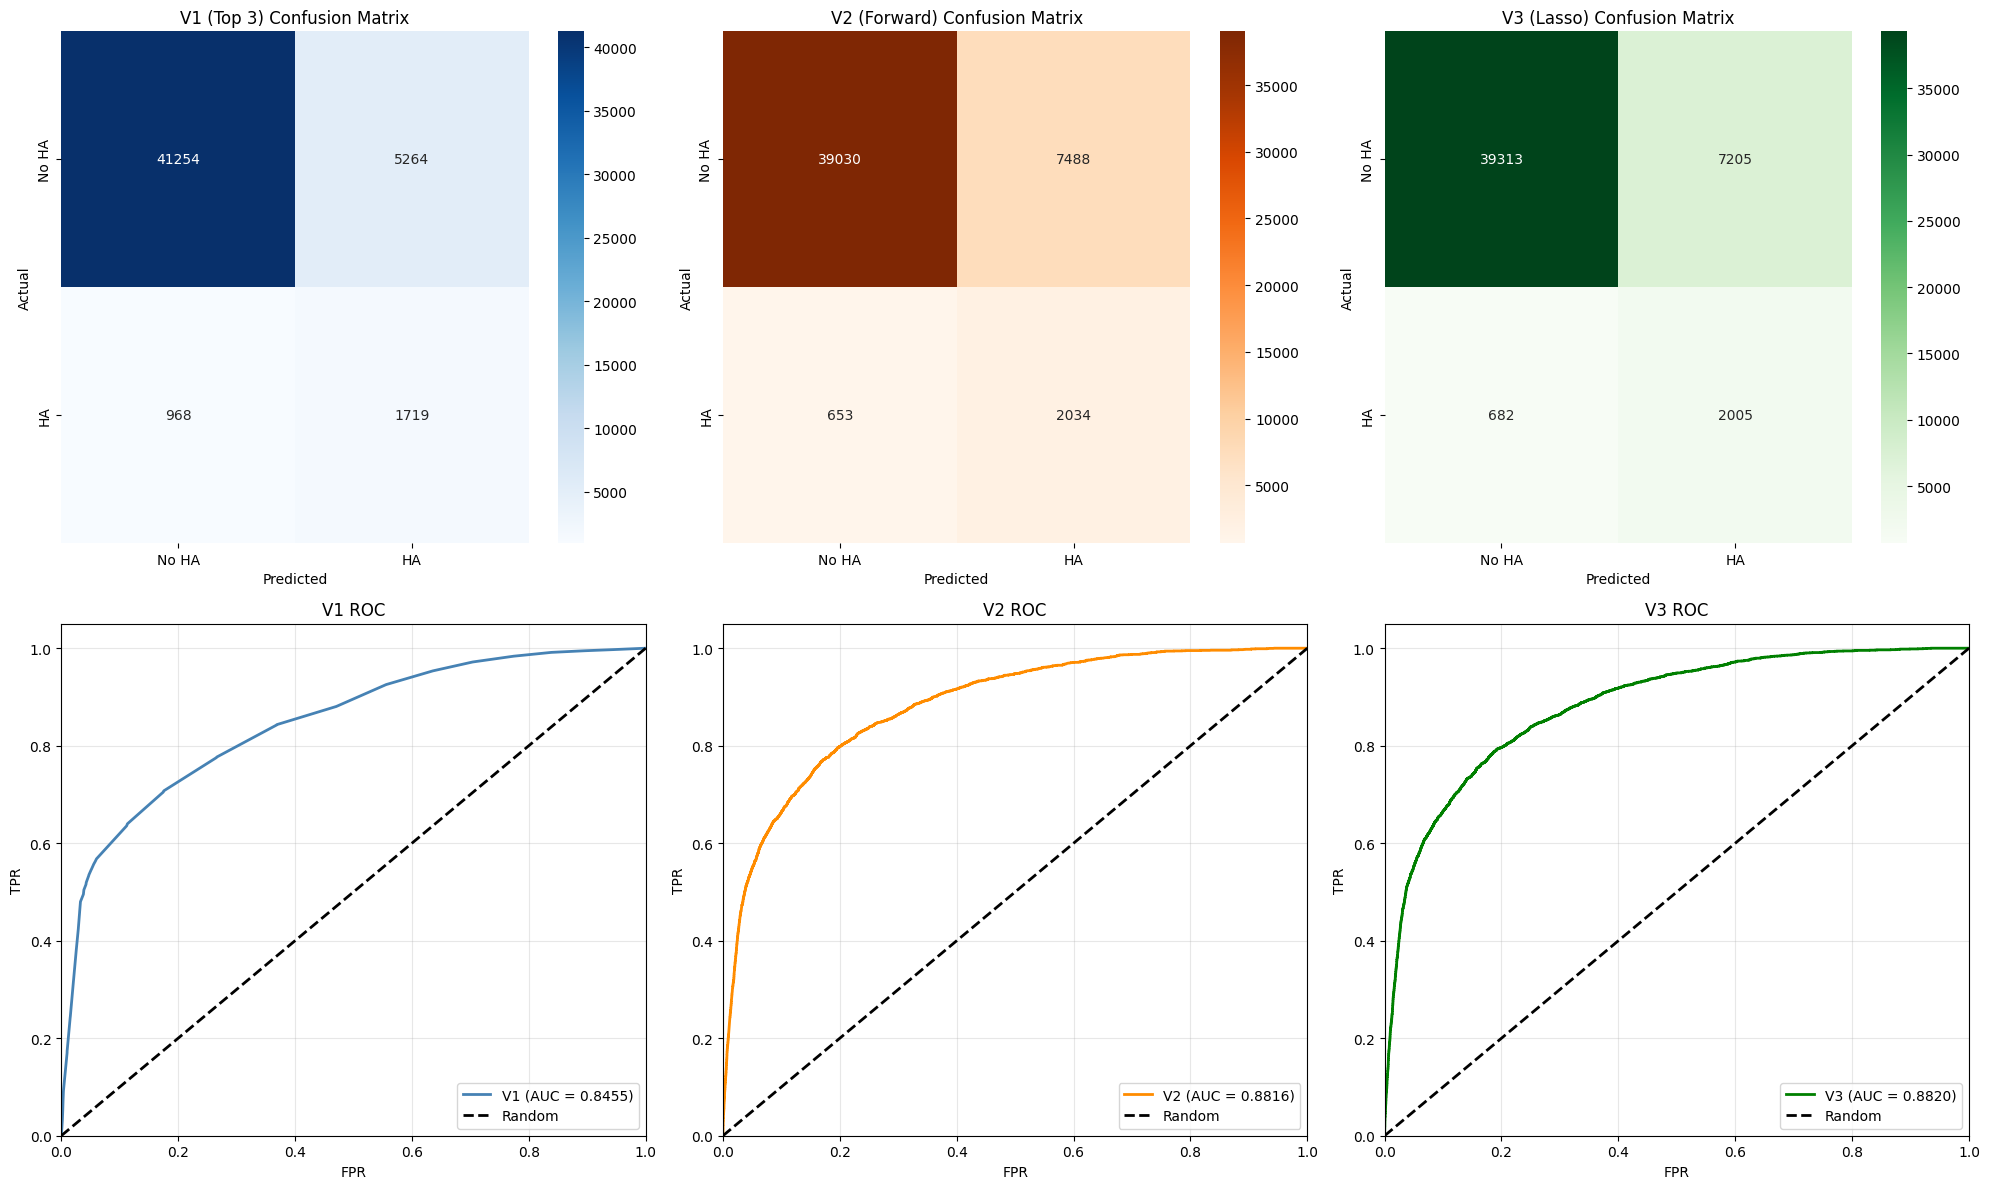

Summary:
V1 (Top 3): caught 1719 of 2687 heart attacks (recall = 0.6397)
V2 (Forward): caught 2034 of 2687 heart attacks (recall = 0.7570)
V3 (Lasso): caught 2005 of 2687 heart attacks (recall = 0.7462)


In [42]:
# side by side comparison
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# confusion matrices
models_cm = [
    ('V1 (Top 3)', confusion_matrix(y_test, y_pred_v1), 'Blues'),
    ('V2 (Forward)', confusion_matrix(y_test, y_pred_v2), 'Oranges'),
    ('V3 (Lasso)', confusion_matrix(y_test, y_pred_v3), 'Greens')
]

for idx, (name, cm, cmap) in enumerate(models_cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[0, idx],
                xticklabels=['No HA', 'HA'], yticklabels=['No HA', 'HA'])
    axes[0, idx].set_title(f'{name} Confusion Matrix')
    axes[0, idx].set_ylabel('Actual')
    axes[0, idx].set_xlabel('Predicted')

# ROC curves
models_roc = [
    ('V1', y_pred_proba_v1, 'steelblue'),
    ('V2', y_proba_v2, 'darkorange'),
    ('V3', y_proba_v3, 'green')
]

for idx, (name, y_proba, color) in enumerate(models_roc):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    axes[1, idx].plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')
    axes[1, idx].plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
    axes[1, idx].set_xlim([0.0, 1.0])
    axes[1, idx].set_ylim([0.0, 1.05])
    axes[1, idx].set_xlabel('FPR')
    axes[1, idx].set_ylabel('TPR')
    axes[1, idx].set_title(f'{name} ROC')
    axes[1, idx].legend(loc="lower right")
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# summary
print("Summary:")
for name, cm, _ in models_cm:
    recall = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    print(f"{name}: caught {cm[1, 1]} of {cm[1, 0] + cm[1, 1]} heart attacks (recall = {recall:.4f})")

## CV Results Summary

5-fold cross-validation ROC-AUC:
- V1 (Top 3): ~0.85
- V2 (Forward): ~0.88
- V3 (Lasso): ~0.89

V3 has a slight edge, and all models generalize well (test ≈ CV performance).

In [43]:
# final test results for V3 (best model)
y_pred_final = best_lasso_model.predict(X_test)
y_proba_final = best_lasso_model.predict_proba(X_test)[:, 1]

final_auc = roc_auc_score(y_test, y_proba_final)
final_recall = recall_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_accuracy = accuracy_score(y_test, y_pred_final)

cm = confusion_matrix(y_test, y_pred_final)
tn, fp, fn, tp = cm.ravel()

print("V3 Final Test Results:")
print(f"  AUC: {final_auc:.4f}")
print(f"  Recall: {final_recall:.4f}")
print(f"  Precision: {final_precision:.4f}")
print(f"  F1: {final_f1:.4f}")
print(f"  Accuracy: {final_accuracy:.4f}")
print(f"\nCaught {tp}/{tp+fn} heart attacks ({final_recall*100:.1f}%)")

print(f"\nCV AUC: {cv_results_v3['roc_auc']['mean']:.4f}")
print(f"Test AUC: {final_auc:.4f}")
print(f"Diff: {final_auc - cv_results_v3['roc_auc']['mean']:.4f} (no overfitting)")

V3 Final Test Results:
  AUC: 0.8820
  Recall: 0.7462
  Precision: 0.2177
  F1: 0.3371
  Accuracy: 0.8397

Caught 2005/2687 heart attacks (74.6%)

CV AUC: 0.8866
Test AUC: 0.8820
Diff: -0.0047 (no overfitting)


In [44]:
# final summary table
print("All Models - Test Performance\n")
print(f"{'Model':<20} {'Test AUC':>10} {'CV AUC':>10} {'Features':>10}")
print("-" * 52)
print(f"{'Naive Baseline':<20} {0.5000:>10.4f} {0.5000:>10.4f} {0:>10}")
print(f"{'V1 (Top 3)':<20} {v1_auc:>10.4f} {cv_results_v1['roc_auc']['mean']:>10.4f} {3:>10}")
print(f"{'V2 (Forward)':<20} {metrics['roc_auc']:>10.4f} {cv_results_v2['roc_auc']['mean']:>10.4f} {len(selected_features):>10}")
print(f"{'V3 (Lasso)':<20} {final_auc:>10.4f} {cv_results_v3['roc_auc']['mean']:>10.4f} {len(lasso_selected_features):>10}")
print("-" * 52)
print(f"\nBest: V3 Lasso (AUC = {final_auc:.4f})")

All Models - Test Performance

Model                  Test AUC     CV AUC   Features
----------------------------------------------------
Naive Baseline           0.5000     0.5000          0
V1 (Top 3)               0.8455     0.8499          3
V2 (Forward)             0.8816     0.8866         19
V3 (Lasso)               0.8820     0.8866         27
----------------------------------------------------

Best: V3 Lasso (AUC = 0.8820)
